In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
!pip install statsmodels scikit-learn matplotlib

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.9 MB 208.4 kB/s eta 0:00:47
   ---------------------------------------- 0.1/9.9 MB 300.4 kB/s eta 0:00:33
    --------------------------------------- 0.2/9.9 MB 350.7 kB/s eta 0:00:28
    --------------------------------------- 0.2/9.9 MB 350.7 kB/s eta 0:00:28
    


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 656.4 kB/s eta 0:00:01
   --------------- ---------------------- 102.4/250.9 kB 737.3 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 798.9 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 831.5 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 904.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

# Load your dataset from the provided file path
data = pd.read_excel(r'C:\Users\ASUS\OneDrive\Desktop\machine learning udemy\Usd inr forecast\dataset.xlsx')

# Print the columns to inspect the available column names
print(data.columns)



Index(['Date', 'Price', 'Open', 'High', 'low', 'Volume', 'Chg%'], dtype='object')


In [10]:
import pandas as pd

# Load your dataset from the provided file path
data = pd.read_excel(r'C:\Users\ASUS\OneDrive\Desktop\machine learning udemy\Usd inr forecast\dataset.xlsx')

# Convert 'Date' column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Sort data by date to ensure chronological order
data.sort_index(inplace=True)

# Focus on the 'Price' column (USD/INR exchange rate)
price_data = data['Price']

# Display the first few rows to confirm
print(price_data.head())


Date
2014-06-09    59.205
2014-06-10    59.215
2014-06-11    59.340
2014-06-12    59.295
2014-06-13    59.710
Name: Price, dtype: float64


In [12]:
from statsmodels.tsa.stattools import adfuller

# Function to check for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    # Decision based on p-value
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary, differencing is required")

# Test the original data for stationarity
test_stationarity(price_data)

# If not stationary, difference the series
price_data_diff = price_data.diff().dropna()

# Test the differenced data for stationarity
print("\nTesting differenced data for stationarity:")
test_stationarity(price_data_diff)


ADF Statistic: -0.8145652732561398
p-value: 0.8148061442046008
Critical Values: {'1%': -3.4328006161256743, '5%': -2.862622699657979, '10%': -2.567346357793352}
The data is not stationary, differencing is required

Testing differenced data for stationarity:
ADF Statistic: -25.988789341317542
p-value: 0.0
Critical Values: {'1%': -3.4328006161256743, '5%': -2.862622699657979, '10%': -2.567346357793352}
The data is stationary


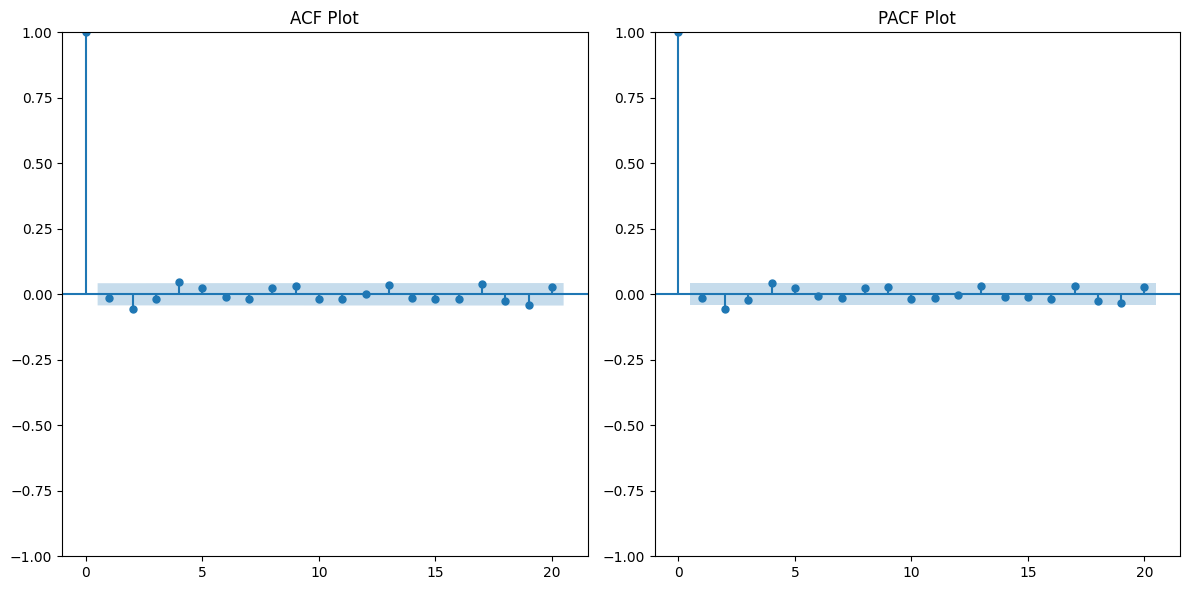

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(price_data_diff) * 0.8)
train, test = price_data_diff[:train_size], price_data_diff[train_size:]

# Plot ACF and PACF for differenced data
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(train, lags=20, ax=plt.gca())
plt.title("ACF Plot")

# PACF plot
plt.subplot(122)
plot_pacf(train, lags=20, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train, order=(1, 1, 0))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2140
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -449.583
Date:                Wed, 09 Oct 2024   AIC                            903.167
Time:                        15:59:46   BIC                            914.503
Sample:                             0   HQIC                           907.315
                               - 2140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4794      0.014    -35.313      0.000      -0.506      -0.453
sigma2         0.0891      0.002     46.770      0.000       0.085       0.093
Ljung-Box (L1) (Q):                  60.06   Jarque-

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


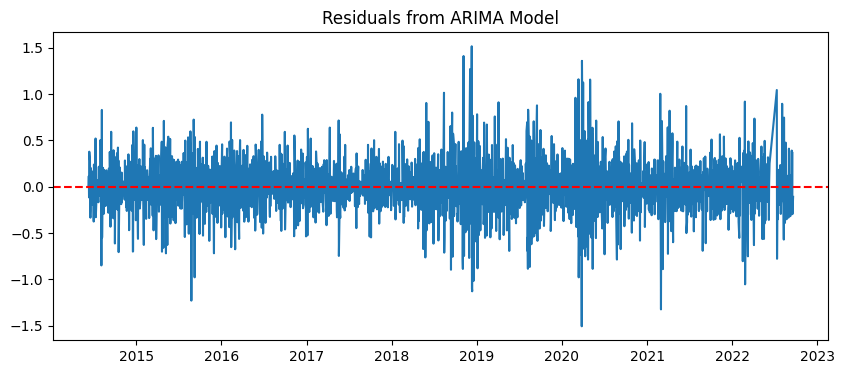

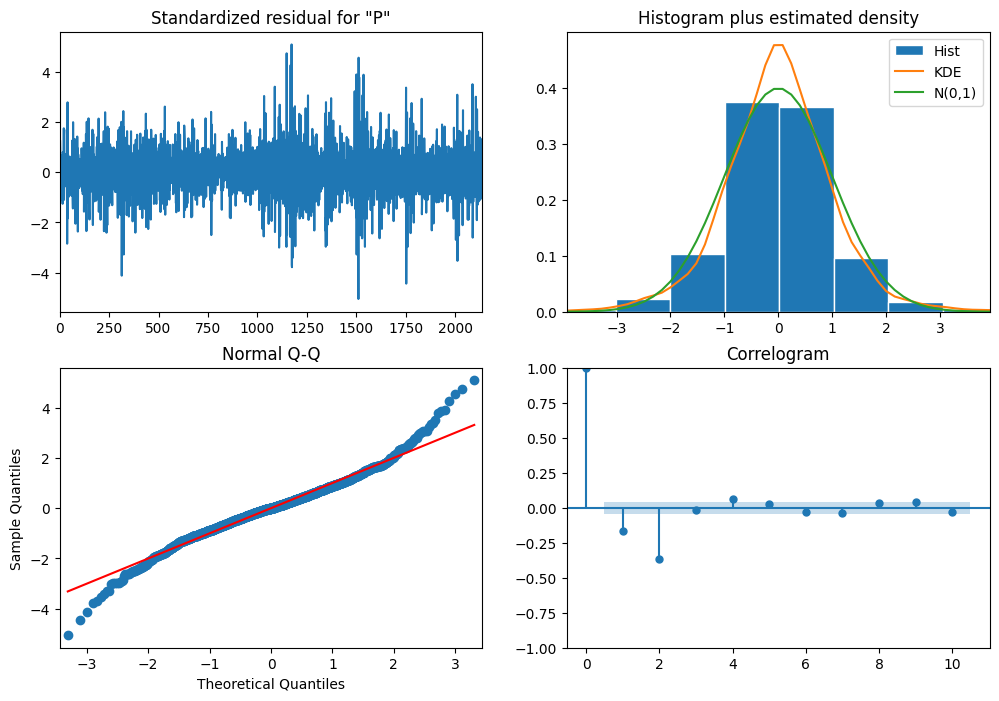

In [20]:
fitted_model = model.fit()
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Additional diagnostics can also be plotted using the plot_diagnostics method
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()


In [21]:
#Using Logarithmic transformation to improve
import numpy as np
import pandas as pd


log_data = np.log(price_data)

# Fit ARIMA model on the transformed data
from statsmodels.tsa.arima.model import ARIMA

# Split data if not yet done
train_size = int(len(log_data) * 0.8)
train, test = log_data[:train_size], log_data[train_size:]

# Fit the model
model_log = ARIMA(train, order=(1, 1, 0))  # Adjust order as needed
fitted_model_log = model_log.fit()

# Check model summary
print(fitted_model_log.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2140
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9110.088
Date:                Wed, 09 Oct 2024   AIC                         -18216.175
Time:                        16:10:16   BIC                         -18204.839
Sample:                             0   HQIC                        -18212.027
                               - 2140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0118      0.018     -0.662      0.508      -0.047       0.023
sigma2       1.17e-05   2.25e-07     52.010      0.000    1.13e-05    1.21e-05
Ljung-Box (L1) (Q):                   0.01   Jarque-

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


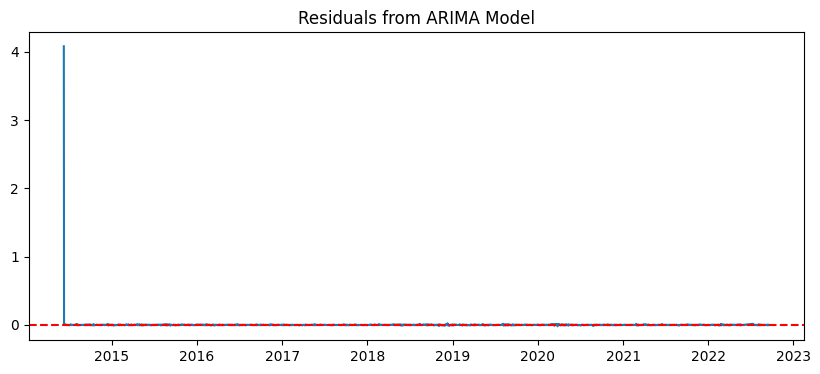

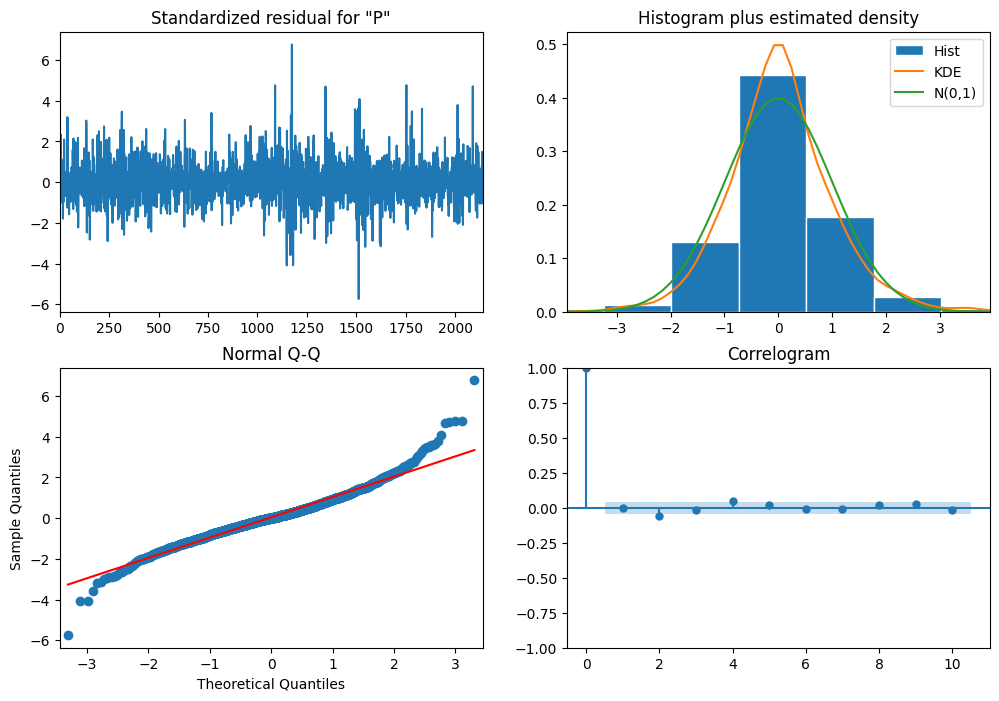

In [23]:
fitted_model = model_log.fit()
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Additional diagnostics can also be plotted using the plot_diagnostics method
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()


In [24]:
#Using box-cox transformation
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA

# Box-Cox transformation requires strictly positive data
# Ensure your data has no zero or negative values
boxcox_data, lambda_ = boxcox(price_data)

# Save the lambda value used for transformation, it will be needed for inverse transformation
print("Lambda for Box-Cox Transformation:", lambda_)

# Fit ARIMA model on the transformed data
train_size = int(len(boxcox_data) * 0.8)
train, test = boxcox_data[:train_size], boxcox_data[train_size:]

model_boxcox = ARIMA(train, order=(1, 1, 0))  # Adjust order as needed
fitted_model_boxcox = model_boxcox.fit()

# Check model summary
print(fitted_model_boxcox.summary())


Lambda for Box-Cox Transformation: -1.0589387869004157
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2140
Model:                 ARIMA(1, 1, 0)   Log Likelihood               18706.583
Date:                Wed, 09 Oct 2024   AIC                         -37409.167
Time:                        16:11:51   BIC                         -37397.830
Sample:                             0   HQIC                        -37405.018
                               - 2140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0108   2.37e-20  -4.55e+17      0.000      -0.011      -0.011
sigma2      1.484e-09   5.85e-11     25.387      0.000    1.37e-09     1.6e-

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


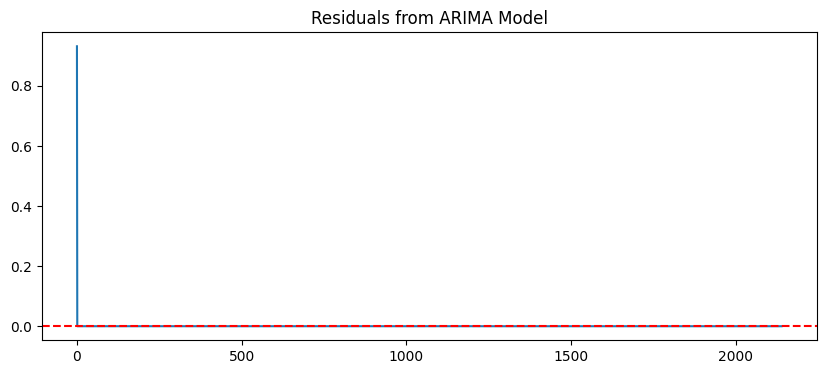

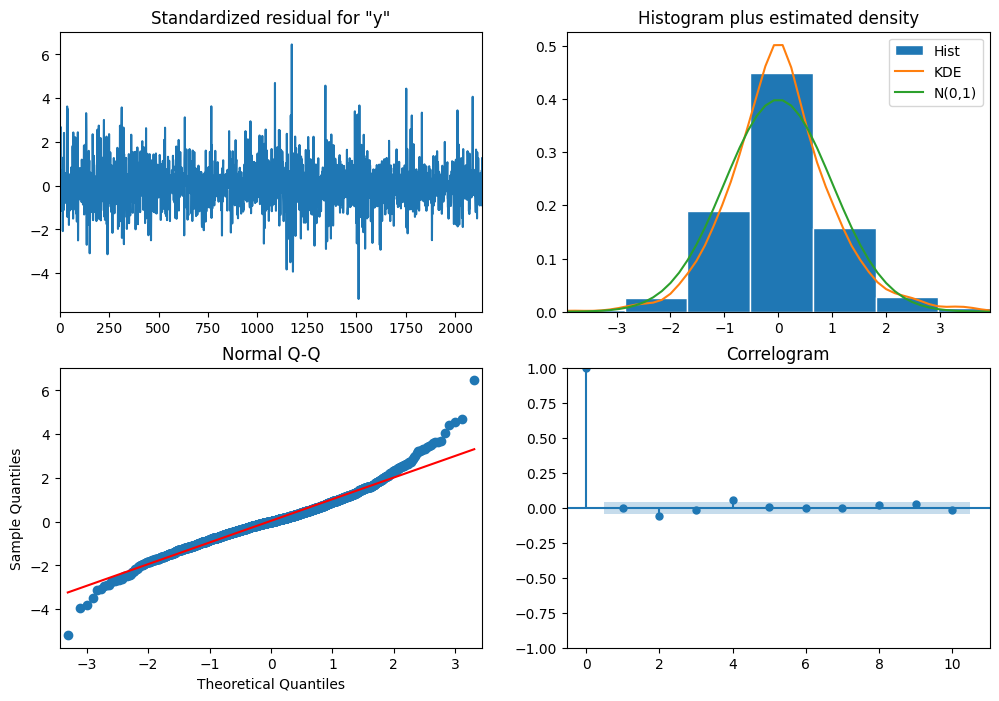

In [25]:
fitted_model = model_boxcox.fit()
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Additional diagnostics can also be plotted using the plot_diagnostics method
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


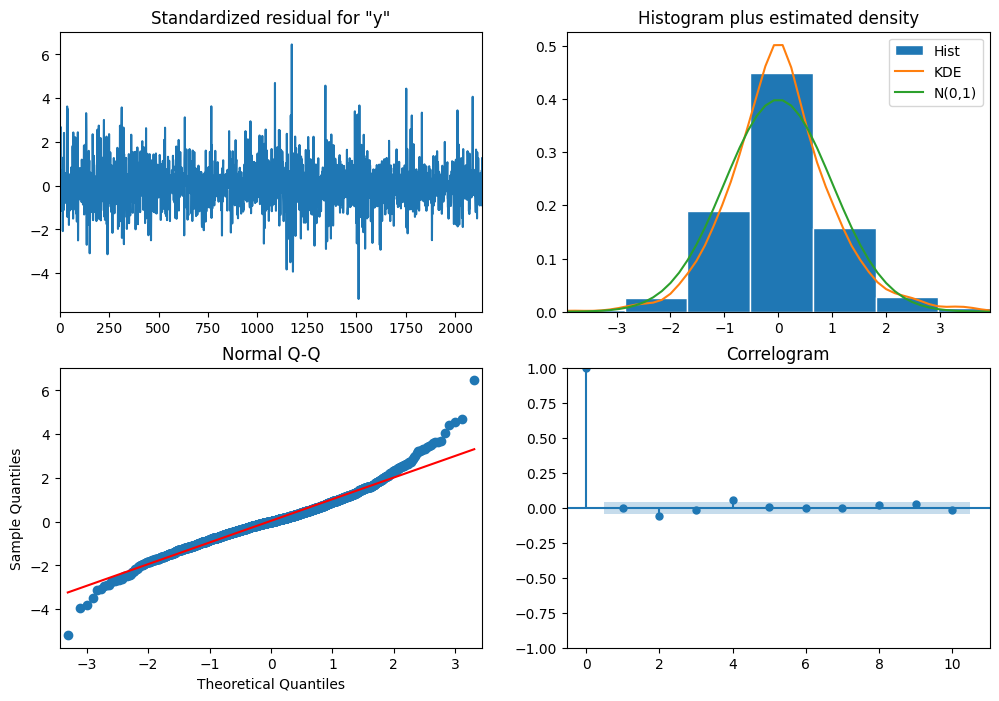

In [26]:
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation
transformed_data, fitted_lambda = yeojohnson(price_data)

# Fit model on transformed data
model_y = ARIMA(train, order=(1, 1, 0))
fitted_model = model_y.fit()

# Check diagnostics again
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()


In [28]:
#GARCH MODEL
!pip install arch



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   - -------------------------------------- 30.7/924.9 kB 1.4 MB/s eta 0:00:01
   --- ------------------------------------ 92.2/924.9 kB 1.7 MB/s eta 0:00:01
   ------ --------------------------------- 143.4/924.9 kB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/924.9 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 286.7/924.9 kB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 327.7/924.9 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 409.6/924.9 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/924.9 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 532.5/924.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------- ----------- 655.4/924.9 kB 1.5 MB/s eta 0:00:01
   ------------------------------ --------- 716.8/924.9 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 839.7/9

In [29]:
import numpy as np
import pandas as pd

returns = 100 * price_data.pct_change().dropna()  # Convert prices to returns


In [30]:
from arch import arch_model

# Fit the GARCH model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='Normal')
garch_result = garch_model.fit(update_freq=5)

# Print the summary of the GARCH model
print(garch_result.summary())


Iteration:      5,   Func. Count:     36,   Neg. LLF: 2978.7585623061223
Iteration:     10,   Func. Count:     67,   Neg. LLF: 532.1794446940464
Optimization terminated successfully    (Exit mode 0)
            Current function value: 532.1793593022517
            Iterations: 13
            Function evaluations: 81
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -532.179
Distribution:                  Normal   AIC:                           1072.36
Method:            Maximum Likelihood   BIC:                           1095.93
                                        No. Observations:                 2675
Date:                Wed, Oct 09 2024   Df Residuals:                     2674
Time:         

In [31]:
forecasts = garch_result.forecast(horizon=10)
print(forecasts.variance[-1:])


                h.01      h.02      h.03      h.04      h.05     h.06  \
Date                                                                    
2024-10-07  0.009483  0.009529  0.009574  0.009619  0.009664  0.00971   

                h.07    h.08      h.09      h.10  
Date                                              
2024-10-07  0.009755  0.0098  0.009846  0.009891  


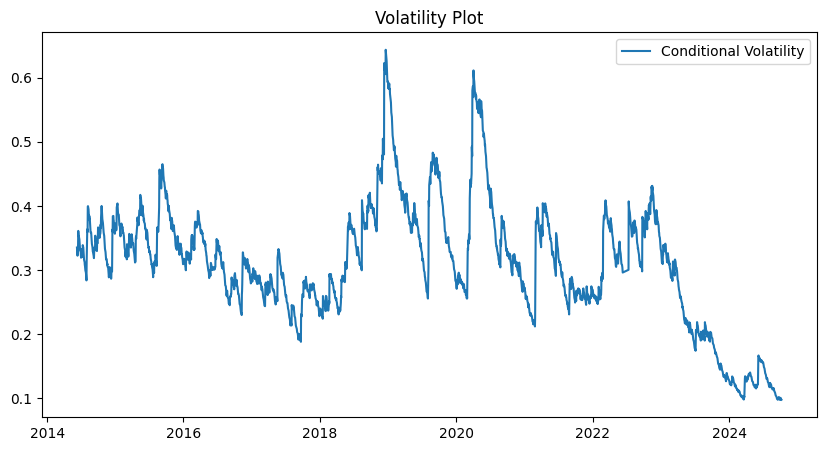

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the conditional volatility
ax.plot(garch_result.conditional_volatility, label='Conditional Volatility')
ax.set_title('Volatility Plot')
ax.legend()

plt.show()


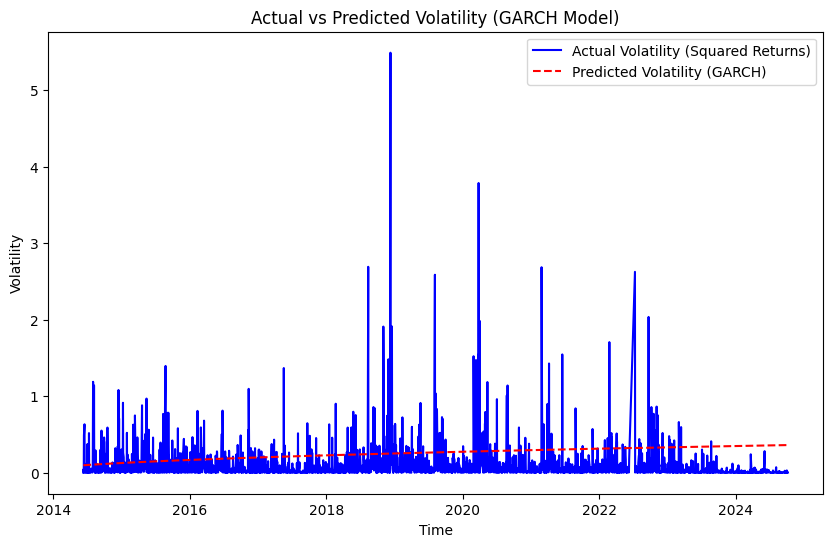

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already fitted the GARCH model and calculated actual_volatility

# Step 1: Actual volatility (squared returns as a proxy for actual volatility)
actual_volatility = returns**2

# Step 2: Forecast future volatility using the GARCH model
garch_forecast = garch_result.forecast(horizon=len(returns))

# Get predicted conditional volatility (from forecast)
predicted_volatility = np.sqrt(garch_forecast.variance.values[-len(actual_volatility):])

# Ensure the predicted_volatility is reshaped to 1D (if needed)
predicted_volatility = predicted_volatility.flatten()  # This reshapes (1, 2675) to (2675,)

# Step 3: Plot actual volatility vs predicted volatility
plt.figure(figsize=(10, 6))

# Plot actual volatility (squared returns)
plt.plot(actual_volatility.index, actual_volatility, label="Actual Volatility (Squared Returns)", color='blue')

# Plot predicted volatility from GARCH
plt.plot(actual_volatility.index, predicted_volatility, label="Predicted Volatility (GARCH)", color='red', linestyle='--')

plt.title("Actual vs Predicted Volatility (GARCH Model)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()



In [ ]:
#Prophet Model

In [35]:
!pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 325.1 kB/s eta 0:00:41
   ---------------------------------------- 0.0/13.3 MB 279.3 kB/s eta 0:00:48
   ---------------------------------------- 0.1/13.3 MB 416.7 kB/s eta 0:00:32
   ---------------------------------------- 0.1/13.3 MB 467.6 kB/s eta 0:00:29
   ---------------------------------------- 0.1/13.3 MB 479.3 kB/s eta 0:00:28
   ---------------------------------------- 0.2/13.3 MB 490.7 kB/s eta 0:00:27
    --------------------------------------- 0.2/13.3 MB 535.8 kB/s eta 0:00:25
    --------------------------------------- 0.2/13.3 MB 540.4 kB/s eta 0:00:25
    --------------------------------------- 0.3/13.3 MB 542.5 kB/s eta 0:00:25
    --------------------------------------- 0.3/13.3 MB 570.1 kB/s eta 0:00:23
    --------------------------------------- 0.3/13.3 MB 596.7 kB/s eta


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
print(type(price_data))



<class 'pandas.core.series.Series'>


In [39]:
print(price_data.head())


Date
2014-06-09    59.205
2014-06-10    59.215
2014-06-11    59.340
2014-06-12    59.295
2014-06-13    59.710
Name: Price, dtype: float64


In [41]:
# Convert Series to DataFrame and reset the index to have 'Date' as a column
price_data_df = price_data.reset_index()

# Rename the columns to fit Prophet's requirements
price_data_df.columns = ['ds', 'y']

# Print the DataFrame to verify the structure
print(price_data_df.head())


          ds       y
0 2014-06-09  59.205
1 2014-06-10  59.215
2 2014-06-11  59.340
3 2014-06-12  59.295
4 2014-06-13  59.710


Importing plotly failed. Interactive plots will not work.
09:49:12 - cmdstanpy - INFO - Chain [1] start processing
09:49:13 - cmdstanpy - INFO - Chain [1] done processing


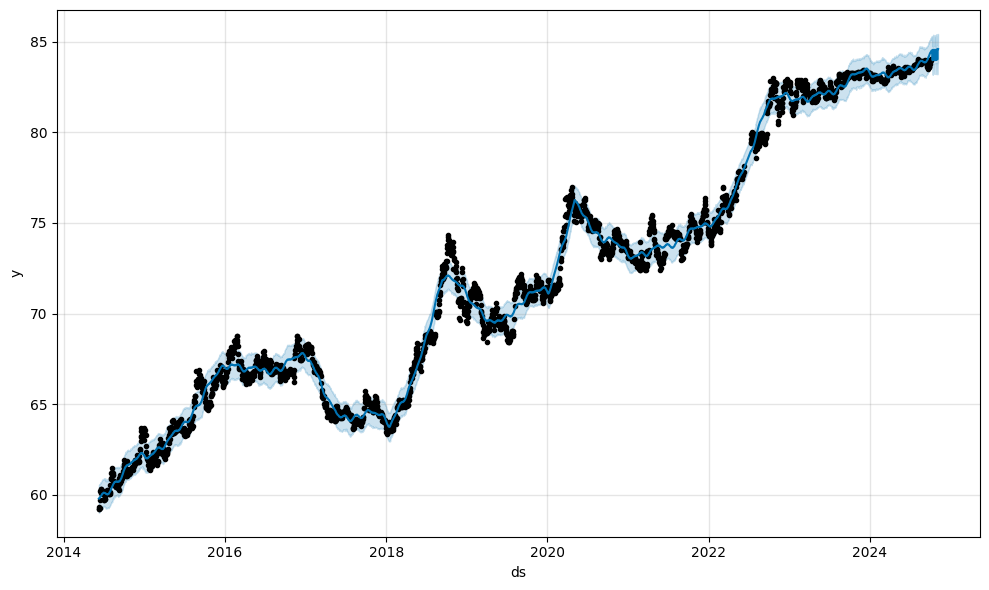

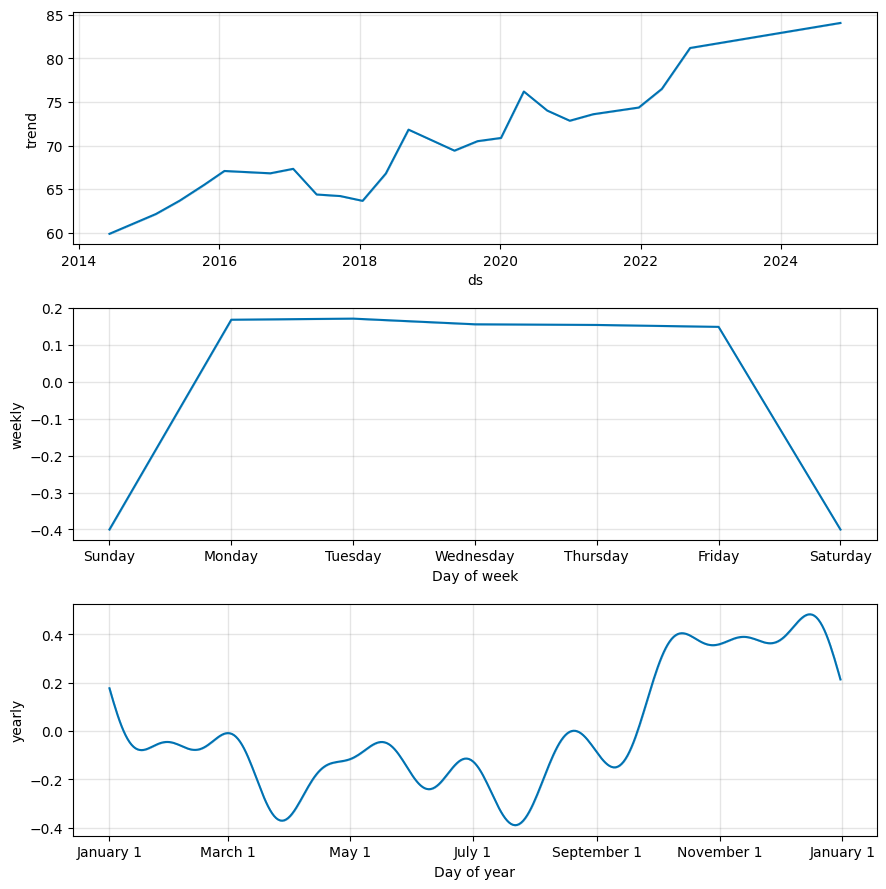

In [42]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model to your prepared data
model.fit(price_data_df)

# Create a future dataframe to forecast 30 days into the future
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Plot the forecasted values
fig = model.plot(forecast)
plt.show()

# Plot forecast components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


In [43]:
# Step 3: Create a future dataframe for predictions (let's say we want 30 days ahead)
future = model.make_future_dataframe(periods=30)

# Step 4: Make predictions
forecast = model.predict(future)


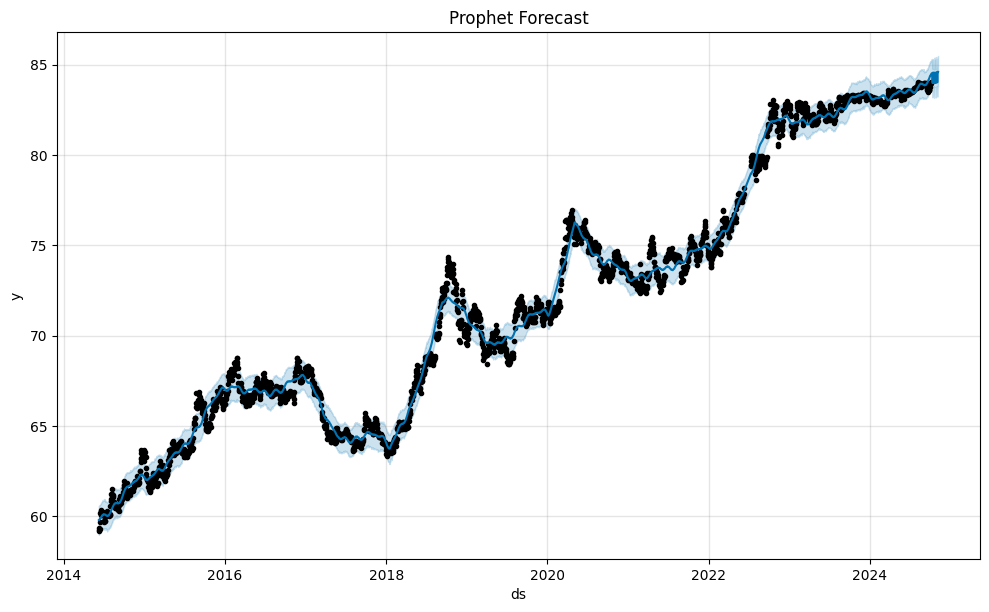

In [44]:
# Step 5: Plot the forecasted values
fig = model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()


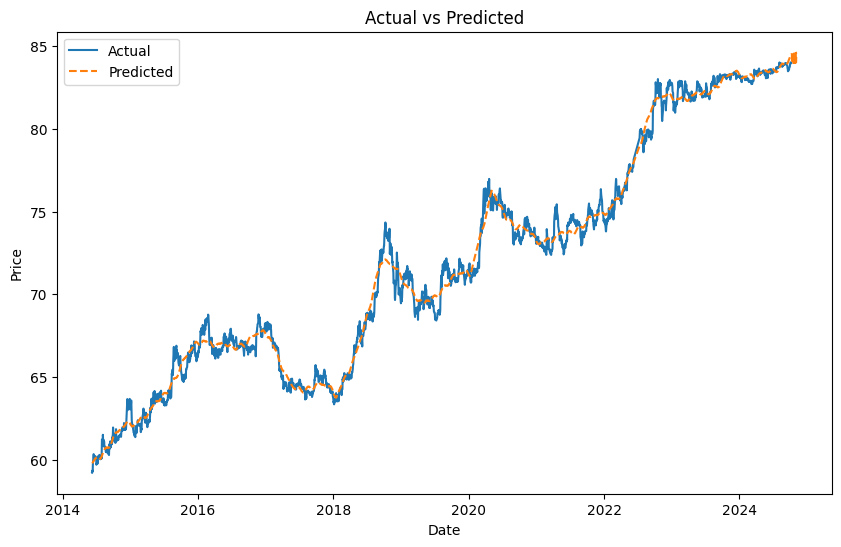

In [47]:
# Ensure you're using the correct DataFrame for actual values
actual = price_data_df.set_index('ds')

# For predicted values, make sure to use the 'ds' and 'yhat' columns from the forecast
predicted = forecast[['ds', 'yhat']].set_index('ds')

# Now plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual['y'], label='Actual')
plt.plot(predicted['yhat'], label='Predicted', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

